In [1]:
#Importing libraries
! pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Importing datas
companyList = pd.read_csv('companyName.csv')
similarityMatrix = pd.read_csv('refineMatrix.csv')
b = companyList.values
e = []
for sublist in b:
  for item in sublist:
    e.append(item)

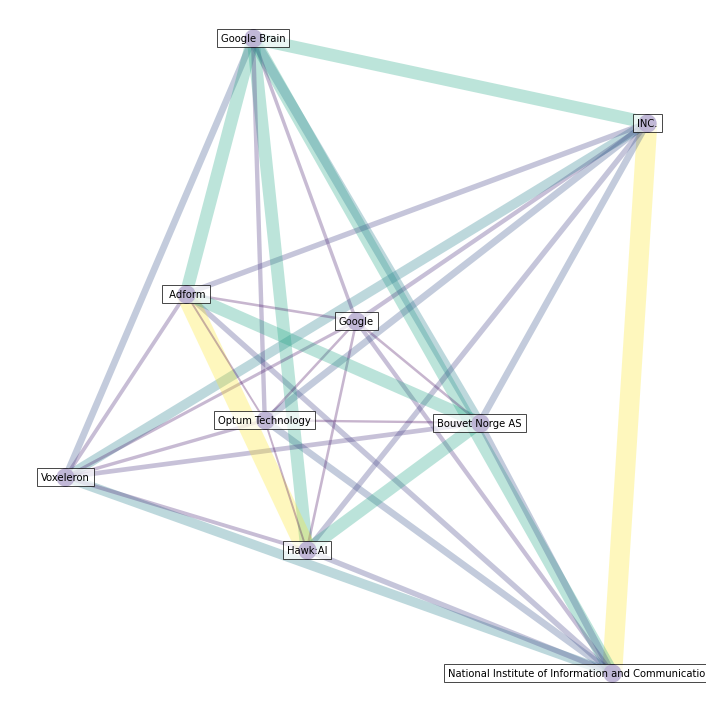

,National Institute of Information and Communications Technology,INC.,Google Brain,Google,Voxeleron,Adform,Hawk:AI,Bouvet Norge AS,Optum Technology
National Institute of Information and Communications Technology,1.000000,1.000000,0.635953,0.215609,0.484144,0.271905,0.271905,0.335886,0.340216
INC.,1.000000,1.000000,0.635953,0.215609,0.484144,0.271905,0.271905,0.335886,0.340216
Google Brain,0.635953,0.635953,0.635953,0.172590,0.337789,0.635953,0.635953,0.481178,0.218784
Google,0.215609,0.215609,0.172590,0.170047,0.152268,0.129572,0.129572,0.127003,0.125339
Voxeleron,0.484144,0.484144,0.337789,0.152268,0.448857,0.191434,0.191434,0.234399,0.169966
Adform,0.271905,0.271905,0.635953,0.129572,0.191434,1.000000,1.000000,0.626470,0.097352
Hawk:AI,0.271905,0.271905,0.635953,0.129572,0.191434,1.000000,1.000000,0.626470,0.097352
Bouvet Norge AS,0.335886,0.335886,0.481178,0.127003,0.234399,0.626470,0.626470,0.626470,0.117259
Optum Technology,0.340216,0.340216,0.218784,0.125339,0.169966,0.097352,0.097352,0.117259,0.339113


In [4]:
def SimByScore(name): 
  initializeMatrix = similarityMatrix.values 
  index = e.index(name)

  #Sorting the target company 8 similar counterparts
  sortingL = []
  for i in range(0,len(e)):
    sortingL.append((initializeMatrix[index][i],e[i],i))
  res1 = sorted(sortingL,key=lambda x: x[0],reverse=True)[:9]
  res2 = [i[2] for i in res1]
  compName = [i[1] for i in res1]
  resMatrix = np.zeros((len(res2), len(res2)))
  for i in range(0,len(res2)):
    for j in range(0,len(res2)):
      resMatrix[i][j] = initializeMatrix[res2[i]][res2[j]]
  forComp = pd.DataFrame(resMatrix,compName,compName)

  # Generating network graph
  dist_df = forComp
  G = nx.Graph()
  for i, row_i in dist_df.iterrows():
    for j, row_j in dist_df.iterrows():
        G.add_edge(i,j,weight=dist_df.loc[i][j]*20)

  pos = nx.kamada_kawai_layout(G)
  edges = G.edges()
  weights = [G[u][v]['weight'] for u,v in edges]
  cmap = 'bwr'

  fig, ax = plt.subplots(figsize=(10, 10))
  # Visualize graph components
  nx.draw_networkx_edges(G, pos, alpha=0.3, width=weights, edge_color=weights)
  nx.draw_networkx_nodes(G, pos, node_color="#210070", alpha=0.9)
  label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
  nx.draw_networkx_labels(G, pos, font_size=10, bbox=label_options)

  # Resize figure for label readibility
  ax.margins(0.1, 0.05)
  fig.tight_layout()
  plt.axis("off")
  plt.show()
  return forComp
 

SimByScore('Google')